In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import os
import shutil

from tqdm import tqdm
from glob import glob

# Find a best preprocess method

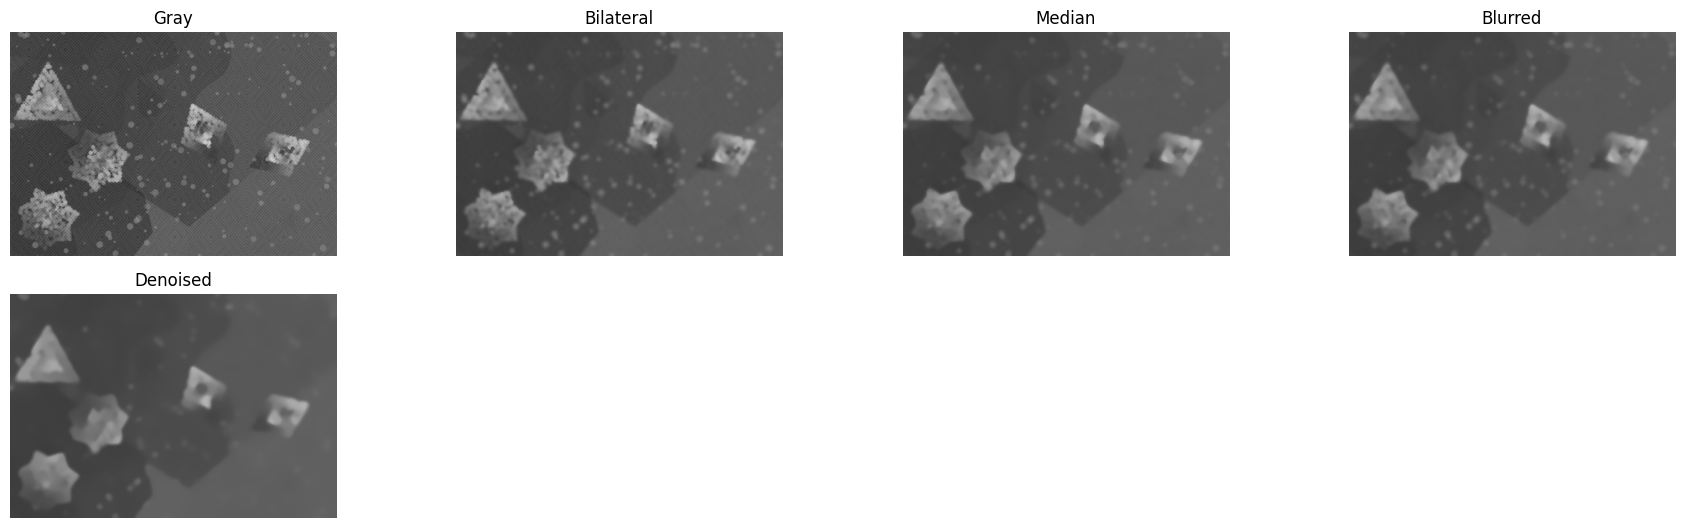

In [2]:
#used for training
import numpy as np
import cv2
import matplotlib.pyplot as plt

def clean_background(image):
    if len(image.shape) > 2:
        if image.shape[2] == 4:  # RGBA
            gray = np.mean(image[:, :, :3], axis=2).astype(np.uint8)
        else:  # BGR or RGB
            gray = np.mean(image, axis=2).astype(np.uint8)
    else:
        gray = image
    # Processing pipeline
    gray = cv2.cvtColor(image, cv2.COLOR_BGRA2GRAY)
    bilateral = cv2.bilateralFilter(gray, 9, 75, 75)
    
    median = cv2.medianBlur(bilateral, 7)
    blurred = cv2.GaussianBlur(median, (3, 3), 0)
    denoised = cv2.fastNlMeansDenoising(blurred, None, 10, 7, 21)
   
    # Collect outputs
    return [gray, bilateral, median, blurred, denoised]
    
img = cv2.imread("C:\\Users\\junha\\Downloads\\shape-dataset\\image1.jpg", cv2.IMREAD_UNCHANGED)
results = clean_background(img)
titles = [
    "Gray", "Bilateral", "Median", "Blurred",
    "Denoised", "Morphological Operations"
]

plt.figure(figsize=(18, 8))
for i, output in enumerate(results):
    plt.subplot(3, 4, i+1)
    plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

